In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import pandas as pd
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud

import CleanTweets as ct

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import plotly.express as px

In [98]:
def draw_bubble(df, x_name, y_name, name, size_,  weight = 60, 

                height=1200, marker_size=None, xaxis= "influencer"

               , yaxis = 'retweet'):

    """df: output of agg_multi_col_bubbles"""

    """ 

    Weighted net sentiment per topic (Engagement) vs net sentiment per topic.

    Size of bubble is a measure of tweet contribution. 

    

    

    Parameters:

    df

    x_name='net_sent',  y_name='w_sent' 

    net_sentiment(float): Net sentiment per tweet (Previously calculated)

    weighted_sentiment(float): Weighted sentiment per tweet (based on influencer score and retweet count,

                                                             determined by agg_multi_col_bubbles) 

                                                             

 

    Returns:

    Bubble (scatter) graph showing weighted net sentiment (Possible Engagement) vs Net Sentiment per topic.    

    """

  

    fig = px.scatter(df, x=x_name, y=y_name,size=size_,

        hover_name=name, size_max=weight, width=1000, height=height,

                     color_discrete_sequence=px.colors.qualitative.Plotly +

                                             px.colors.qualitative.D3+

                                             px.colors.qualitative.G10+

                                             px.colors.qualitative.T10+

                                             px.colors.qualitative.Pastel,

        labels={

                     x_name: xaxis,

                     y_name: yaxis,

                 },log_y=False)

    #fig.update_layout(showlegend=False)

    

    fig.update_layout(legend=dict(

        orientation="h",

        yanchor="bottom",

        y=1.02,

        xanchor="right",

        x=1

    ))

    fig.update_layout(

                yaxis=dict(

                    title=yaxis,

                    titlefont_size=16,

                    tickfont_size=14,

                ))

    if marker_size is not None:

        fig.update_traces(mode='markers', marker_size=marker_size)

    else:

        fig.update_yaxes(showticklabels=False)

        fig.update_layout(legend_title_text='Cluster')

    fig.update_xaxes()

    fig.show()

In [4]:
dendera_zo = pd.read_csv('../data/dendera_reduced.csv')

In [4]:
# dendera_clean = ct.clean_tweets(dendera_zo,content='content',col_name='clean_tweet',
#                 general_clean=True,lemma=True,stem=False,remove_tag=True,remove_mention=True,
#                 remove_emoji=False, remove_stopword=True,min_length=2, untokenized_return=True
#                 )

In [7]:
dendera_clean.to_csv('dendera_clean.csv')

In [14]:
dendera_clean = pd.read_csv('../data/dendera_clean.csv')

## Time/volume tweets - line chart

In [15]:
dendera_clean.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '_type', 'url', 'date', 'content',
       'renderedContent', 'id', 'user', 'replyCount', 'retweetCount',
       'likeCount', 'quoteCount', 'conversationId', 'lang', 'source',
       'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks', 'media',
       'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser',
       'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags',
       'clean_tweet'],
      dtype='object')

In [16]:
int(dendera_clean.date[0][:4])

2021

In [17]:
dendera_clean['year'] = dendera_clean['date'].apply(lambda x: int(x[:4]))

In [18]:
dendera_clean['year'].sample(5)

3611    2017
3074    2018
3440    2017
507     2021
1809    2019
Name: year, dtype: int64

## Time/volume tweets - line chart

In [19]:
tweetByYear = dendera_clean.groupby('year').count().reset_index()

In [20]:
tweetByYear

,year,Unnamed: 0,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet
0,2016,734,734,734,734,734,734,734,734,734,...,0,16,22,22,78,24,22,209,0,734
1,2017,713,713,713,713,713,713,713,713,713,...,0,6,44,44,103,41,41,224,1,713
2,2018,775,775,775,775,775,775,775,775,775,...,0,11,104,104,173,32,32,275,0,775
3,2019,949,949,949,949,949,949,949,949,949,...,0,11,186,186,235,29,29,387,0,949
4,2020,1036,1036,1036,1036,1036,1036,1036,1036,1036,...,0,30,238,238,234,57,57,295,0,1036
5,2021,662,662,662,662,662,662,662,662,662,...,0,34,174,174,193,23,23,206,0,662


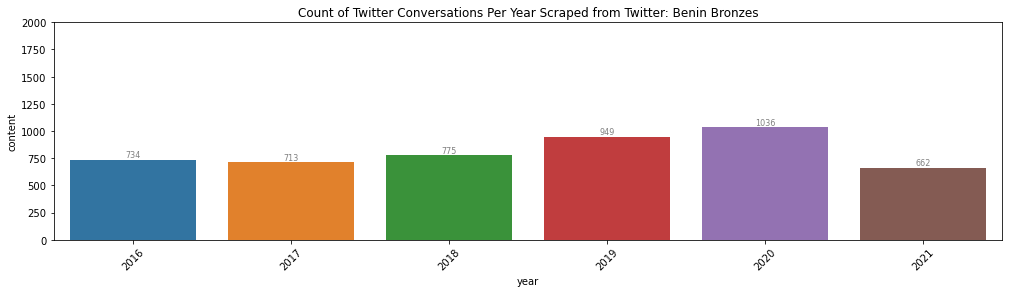

In [21]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Count of Twitter Conversations Per Year Scraped from Twitter: Benin Bronzes')
g = sns.barplot(data=tweetByYear, 
             x="year", 
             y="content") 
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points')
_ = ax.set_ylim(0,2000) #To make space for the annotations62222

plt.savefig('TwitterConvCountDendera.png')

## Keywords - Network diagram

In [22]:
dendera_clean[dendera_clean.clean_tweet == None]

,Unnamed: 0,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,replyCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet,year


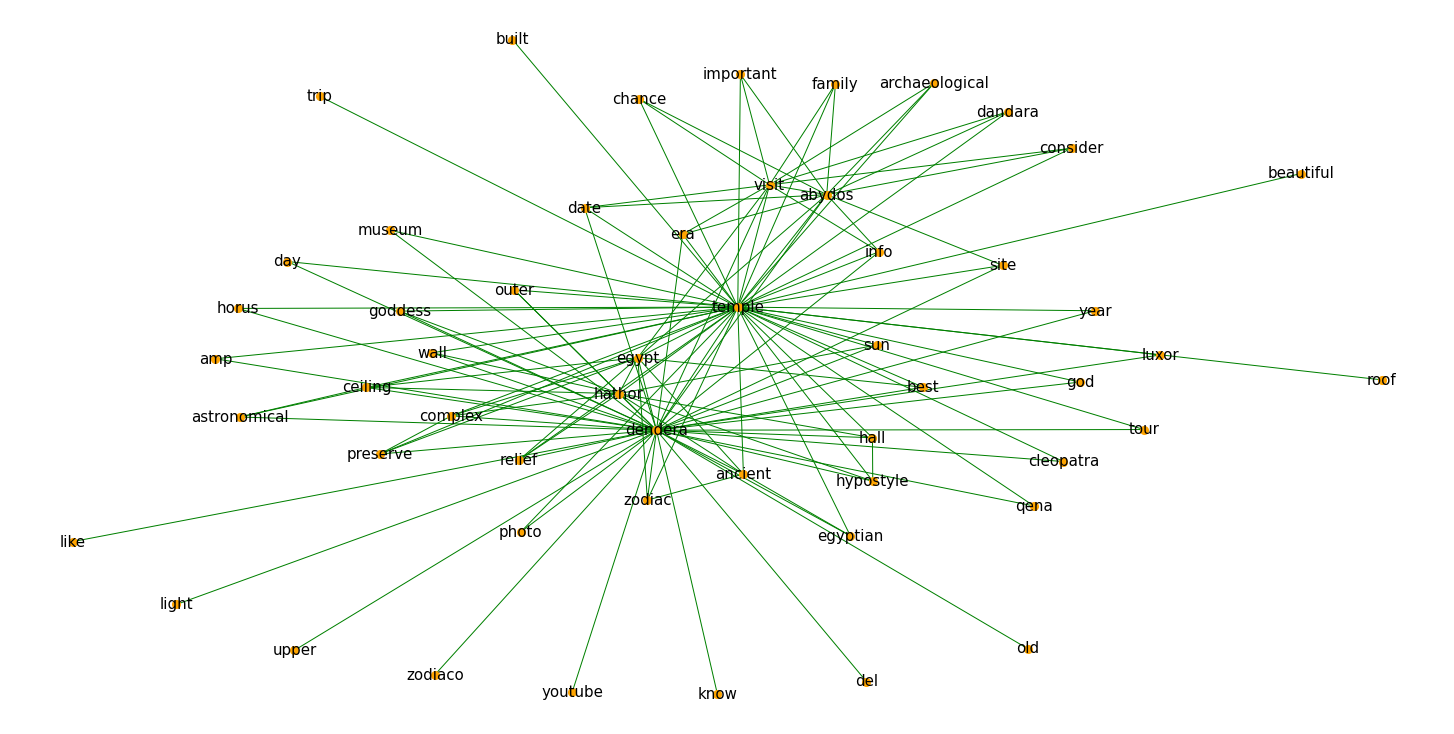

In [23]:
def network_diagram(content_col, filt_val):
    """Draws a network diagram from a given text column
    
        Args:
            :param content_col: Series of strings, column we wish to get a network of.
            :param filt_val: integer, higher numbers filters only on words that have the 
            strongest connection
    """
    
    # You can define your own parameters
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') 
    X = cv.fit_transform(content_col.values.astype('U'))

    # This is the matrix manipulation step
    Xc = (X.T * X) 

    # This are the entity names (i.e. keywords)
    names = cv.get_feature_names() 
    
    # create dataframe of similar names
    df_co = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

    # put df in workable format
    a = df_co.stack().reset_index()
    a.columns = ['var1', 'var2','value']

    a_filtered=a.loc[ (a['value'] > filt_val) & (a['var1'] != a['var2']) ]


    # Build your graph
    plt.figure(figsize=(20,10))

    G=nx.from_pandas_edgelist(a_filtered, 'var1', 'var2')

    # Plot the network
    nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='green', linewidths=2, font_size=15)

network_diagram(dendera_clean.clean_tweet, 120)
plt.savefig('NetworkDiagramDendera.png')

## People vs mentions - CSV list, bar chart

In [24]:
import json

In [25]:
dendera_clean[['user','mentionedUsers']].sample(10)

,user,mentionedUsers
4261,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
3781,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
3984,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
123,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
3356,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
3463,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
1838,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
3833,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
2837,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
3530,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN


In [56]:
def mentions(mentionedUsers):
    mentions = []
    try:
        mentions = []
        for d in mentionedUsers:
            mentions.append(d['username'])
    except TypeError:
        pass
    return mentions
    

In [27]:
pd.set_option('display.max_columns', None)  

In [28]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-28-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [29]:
test = dendera_clean.user[0]
test

"{'_type': 'snscrape.modules.twitter.User', 'username': 'AhmedAb72602862', 'id': 1390791347804807169, 'displayname': 'horus k3 pt 🇪🇬', 'description': 'Archaeoastronomy Master Candidate🌔🔭, Egyptologist, illustrator, Excavator and Inspector Of dEndera teMple%% air conditioning and fridges technicien', 'rawDescription': 'Archaeoastronomy Master Candidate🌔🔭, Egyptologist, illustrator, Excavator and Inspector Of dEndera teMple%% air conditioning and fridges technicien', 'descriptionUrls': None, 'verified': False, 'created': '2021-05-07T22:11:29+00:00', 'followersCount': 59, 'friendsCount': 628, 'statusesCount': 251, 'favouritesCount': 276, 'listedCount': 0, 'mediaCount': 55, 'location': 'Portland, OR', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1390793961686568964/RVrKQcPS_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1390791347804807169/1620426791', 'url': 'https://twitter.com/AhmedAb72602862'}

In [30]:
import ast
ast.literal_eval(test)

{'_type': 'snscrape.modules.twitter.User',
 'username': 'AhmedAb72602862',
 'id': 1390791347804807169,
 'displayname': 'horus k3 pt 🇪🇬',
 'description': 'Archaeoastronomy Master Candidate🌔🔭, Egyptologist, illustrator, Excavator and Inspector Of dEndera teMple%% air conditioning and fridges technicien',
 'rawDescription': 'Archaeoastronomy Master Candidate🌔🔭, Egyptologist, illustrator, Excavator and Inspector Of dEndera teMple%% air conditioning and fridges technicien',
 'descriptionUrls': None,
 'verified': False,
 'created': '2021-05-07T22:11:29+00:00',
 'followersCount': 59,
 'friendsCount': 628,
 'statusesCount': 251,
 'favouritesCount': 276,
 'listedCount': 0,
 'mediaCount': 55,
 'location': 'Portland, OR',
 'protected': False,
 'linkUrl': None,
 'linkTcourl': None,
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1390793961686568964/RVrKQcPS_normal.jpg',
 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1390791347804807169/1620426791',
 'url': 'https://twitter.c

In [31]:
dendera_clean['username'] = dendera_clean.user.apply(lambda x: ast.literal_eval(x)['username'])

In [39]:
dendera_clean['username'].sample(10)

3483    megportal      
2658    FreyaIngva     
182     SanctumAncient 
1113    DMRHerbs       
2440    egymuseum      
4834    manoel1806     
52      aabLIeFkZXy0tvT
2973    MsSamsoroca    
1353    maleqaly       
2212    shipibospirit  
Name: username, dtype: object

In [54]:
def literal_eval(item):
    try:
        return ast.literal_eval(item)
    except ValueError:
        pass
literal_eval(np.nan)

In [57]:
dendera_clean['mentionedUsernames'] = dendera_clean.mentionedUsers.apply(lambda x: mentions(literal_eval(x)))

In [60]:
dendera_clean.mentionedUsernames.sample(10)

1735    [TrysonChimbetu1, HMetro_, bustoptv, restmutore, Wamagaisa, fortunechasi, alickmacheso3]        
2763    []                                                                                              
1709    []                                                                                              
2825    []                                                                                              
4594    []                                                                                              
602     [AnjaBotswana]                                                                                  
1954    [HMetro_, alickmacheso3, SunguraCentral, bustoptv, NewsDayZimbabwe, ZBCNewsonline, DailyNewsZim]
2904    []                                                                                              
2848    [eBay]                                                                                          
4654    []                                             

In [62]:
dendera_clean[['username', 'mentionedUsernames']]

,username,mentionedUsernames
0,AhmedAb72602862,[ManonYSchutz]
1,lorenzo05458489,[YouTube]
2,CynthiaGarbutt,"[Pastpreservers, DrPioneer18, enigmaTV]"
3,AfterHardship,[benjancewicz]
4,ManonYSchutz,[]
...,...,...
4864,pahenoch,[]
4865,PJelenaena,[]
4866,PJelenaena,[]
4867,soundXlight,[]


In [63]:
dendera_clean[['username', 'mentionedUsers']].to_csv('../data/peopleVmentions_dendera.csv')

In [64]:
from collections import Counter

In [66]:
mentionList = list(dendera_clean['mentionedUsernames'])
flat_list = [item for sublist in mentionList for item in sublist]
flat_list[:10]

['ManonYSchutz',
 'YouTube',
 'Pastpreservers',
 'DrPioneer18',
 'enigmaTV',
 'benjancewicz',
 'DrPioneer18',
 'EyelivebyFATE',
 'adgunty',
 'MercedesBenz']

In [67]:
most_mentioned = dict(Counter(flat_list).most_common(20))
most_mentioned

{'YouTube': 150,
 'bustoptv': 57,
 'HMetro_': 43,
 'TrysonChimbetu1': 39,
 'alickmacheso3': 37,
 'SunguraCentral': 29,
 'EgyptWithAhmed': 27,
 'NewsDayZimbabwe': 23,
 'DailyNewsZim': 22,
 'HeraldZimbabwe': 21,
 'restmutore': 20,
 'ancientorigins': 16,
 'MuseeLouvre': 15,
 'Wamagaisa': 14,
 'fortunechasi': 11,
 'bettanyhughes': 10,
 'Freeflipfr': 10,
 'ManonYSchutz': 9,
 'AHC_Channel': 9,
 'MattSibson': 9}

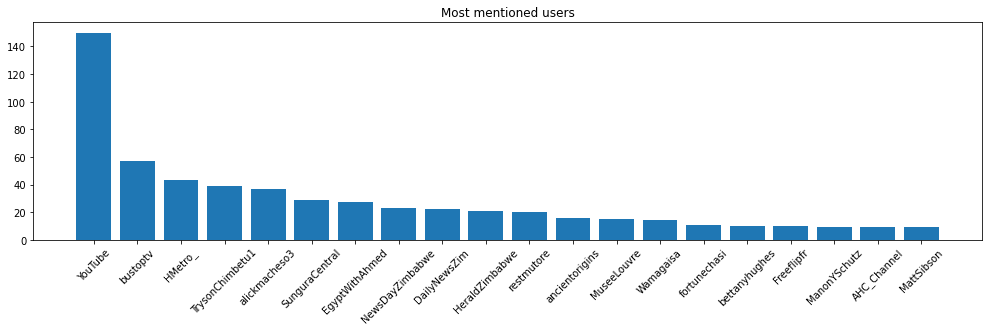

In [102]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Most mentioned users')
g = plt.bar(most_mentioned.keys(), most_mentioned.values())
ax=g
plt.savefig('mostMentioned_dendera.png')

## Geography - bar chart

In [202]:
dendera_clean.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username', 'followersCount'],
      dtype='object')

In [227]:
dendera_clean.coordinates is None

False

In [70]:
loc_bb = dendera_clean[dendera_clean.coordinates.isnull() == False]
print(loc_bb.shape)
print(dendera_clean.shape)

(206, 34)
(4869, 34)


From our list of locations, only 390 have a lattittude and longitude attached. The rest just have country names and states, building a chloropleth from that is a bit tricky.

For now, we will substitute with a simple bar graph with information about the countries in our dataset.

In [72]:
# loc_bb['long'] = loc_bb.coordinates.apply(lambda x:x['longitude'])
# loc_bb['lat'] = loc_bb.coordinates.apply(lambda x:x['latitude'])

In [74]:
dendera_clean['location'] = dendera_clean.user.apply(lambda x: literal_eval(x)['location'])

In [76]:
has_loc = dendera_clean[dendera_clean.location != '']
has_loc.shape

(3533, 35)

In [77]:
s1 = has_loc[has_loc.location.str.contains(',')]
s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
s1['no_words'] = s1.country.apply(lambda x: len(x.split()))
s1 = s1[s1.no_words == 1]
s1.shape

<ipython-input-77-6d46060bb0ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
<ipython-input-77-6d46060bb0ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['no_words'] = s1.country.apply(lambda x: len(x.split()))


(1437, 37)

Origin of users that post tweets

<AxesSubplot:>

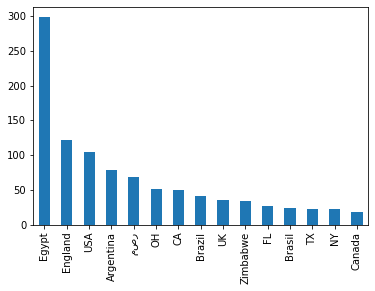

In [78]:
s1['country'].value_counts()[:15].plot(kind="bar")

## User + Retweets + Replies + Followers (agregation) - Top 20 influencers(diagram), all csv 

In [83]:
dendera_clean['followersCount'] = dendera_clean.user.apply(lambda x: literal_eval(x)['followersCount'])

In [84]:
topn = dendera_clean[['username', 'retweetCount', 'replyCount']].groupby('username').sum().sort_values('retweetCount', ascending=False).reset_index()

In [85]:
topn

,username,retweetCount,replyCount
0,archaeologyart,1641,57
1,_rjardon,1033,19
2,A_Genena1,856,22
3,ArtifactsHub,777,36
4,DigitalMapsAW,684,23
...,...,...,...
2255,SergoParulava,0,0
2256,SenaCargle,0,0
2257,Semiogogue,0,1
2258,Selene,0,0


In [87]:
topInfl = pd.merge(topn, dendera_clean[['username', 'followersCount']], how='left', on='username').drop_duplicates().groupby('username').mean().round().reset_index().sort_values('retweetCount', ascending=False)

In [88]:
topInfl

,username,retweetCount,replyCount,followersCount
1363,archaeologyart,1641.0,57.0,223929.0
1296,_rjardon,1033.0,19.0,10403.0
42,A_Genena1,856.0,22.0,6877.0
160,ArtifactsHub,777.0,36.0,597163.0
336,DigitalMapsAW,684.0,23.0,59156.0
...,...,...,...,...
1068,SergoParulava,0.0,0.0,29.0
1067,SenaCargle,0.0,0.0,18.0
1066,Semiogogue,0.0,1.0,4154.0
1065,Selene,0.0,0.0,1033.0


In [89]:
topInfl.to_csv('../data/topInfluencers_dendera.csv')

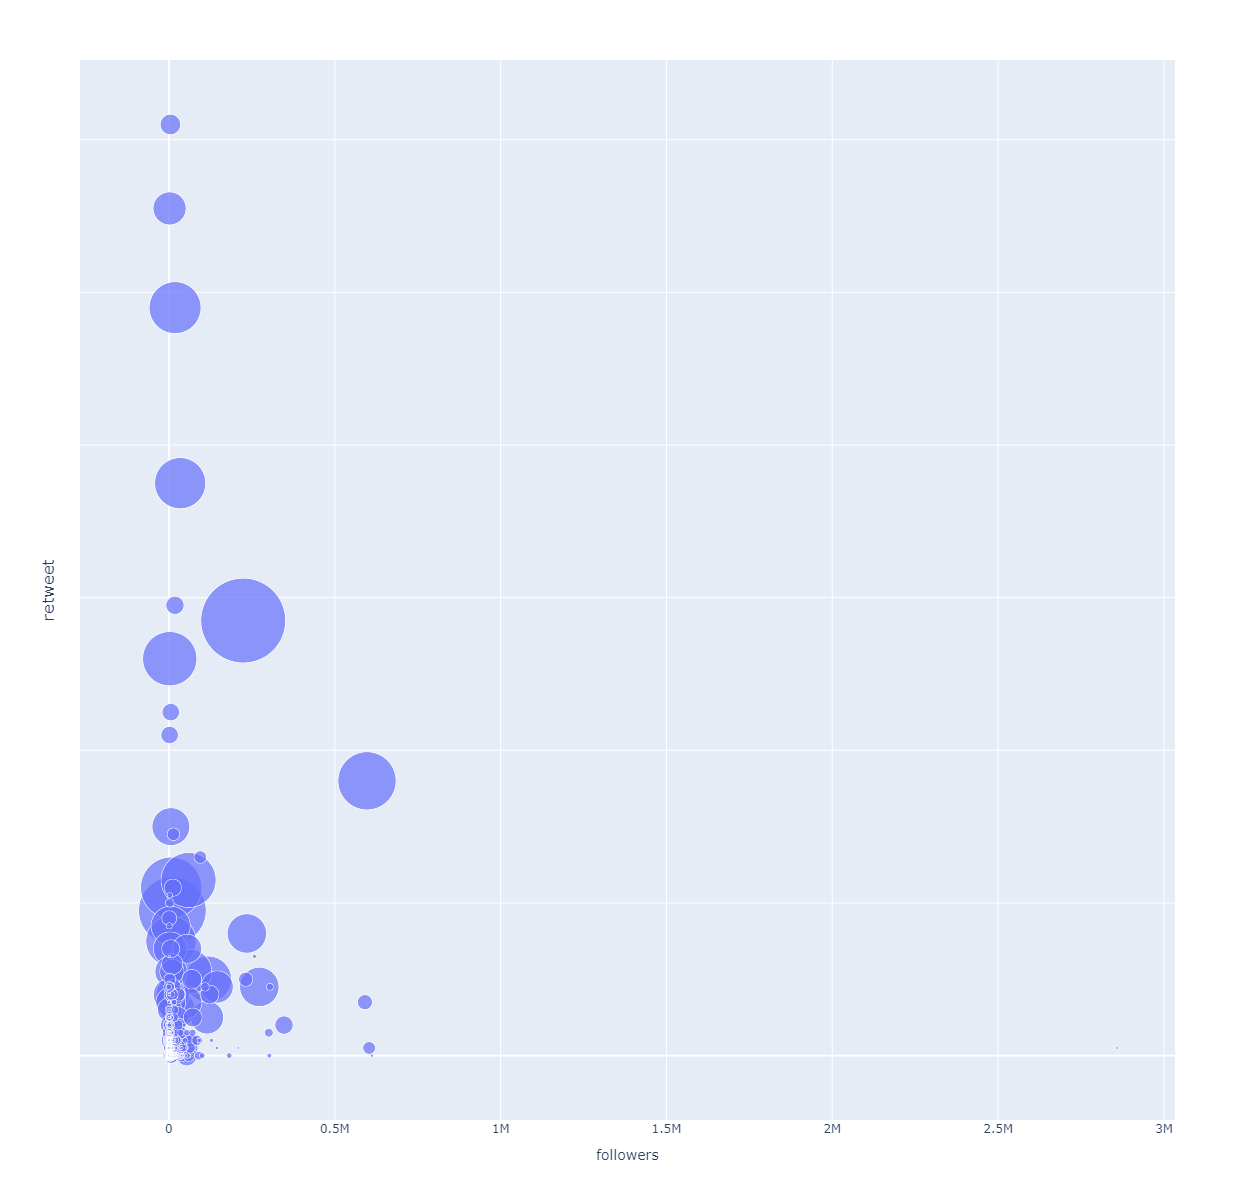

<Figure size 432x288 with 0 Axes>

In [101]:
draw_bubble(topInfl, 'followersCount', 'replyCount', 'username', size_ = 'retweetCount',  weight = 60, height=1200, marker_size=None, xaxis= "followers", yaxis = 'retweet')
plt.savefig('topInfluencersBubble_dendera.png')